In [1]:
import Pkg; Pkg.activate("../.")
using OceanDynamicalModes
using PyPlot, LinearAlgebra
using MeshArrays

  Activating project at `~/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/Documents/GitHub/OceanDynamicalModes.jl`


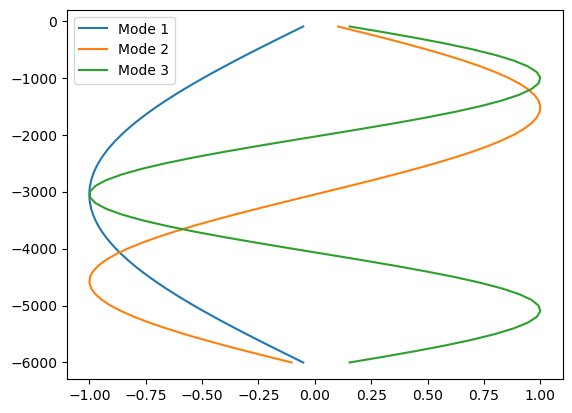

In [163]:
dz = 100; H = 6100
depth = collect(0 + dz:dz:H-dz)
N² = 1e-6
Nsq = N² .* ones(length(depth))
nmodes = 3
wmodes, pmodes, ce = dynmodes(Nsq, depth, dz, nmodes);

#plot the modes
fig, ax = plt.subplots()
for i = 1:3
    ax.plot(wmodes[:, i], -depth, label = "Mode " * string(i))
end
ax.legend()
fig

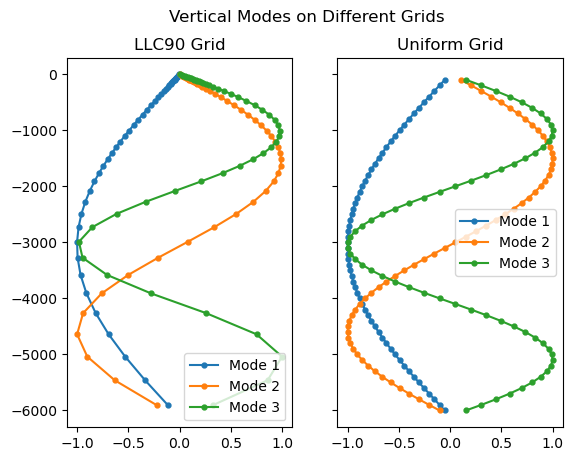

In [ ]:
pth = MeshArrays.GRID_LLC90
γ = GridSpec("LatLonCap",pth)
Γ = GridLoad(γ;option="full");
delSq_LLC90 = build_delsq_matrix_LLC90(Γ)
depth_LLC90 = -Γ.RC;

Nsq_LLC90 = N² .* ones(length(depth_LLC90))

wmodes_LLC90, ce_LLC90 = dynmodes(delSq_LLC90, diagm(Nsq_LLC90); nmodes = nmodes)

#plot the modes
fig1, axs = plt.subplots(1, 2, sharex = true, sharey = true)
for i = 1:3
    axs[1].plot(wmodes_LLC90[:, i], -depth_LLC90, label = "Mode " * string(i), marker = "o", markersize = 3.5)
    axs[2].plot(wmodes[:, i], -depth, label = "Mode " * string(i), marker = "o", markersize = 3.5)
end
fig1.suptitle("Vertical Modes on Different Grids")
axs[1].set_title("LLC90 Grid")
axs[2].set_title("Uniform Grid")

[a.legend() for a in axs]
fig1

In [165]:
ce_analytical =  (sqrt(N²) * H) ./ (LinRange(1., 3., 3) .* π)

println("Analytical Speeds: ", ce_analytical)
println("LLC90 Vertical Grid Numerical Speeds: ", ce_LLC90 )
println("Uniformly Spaced Grid Numerical Speeds: ", ce)


Analytical Speeds: [1.9416903057211234, 0.9708451528605617, 0.6472301019070411]
LLC90 Vertical Grid Numerical Speeds: [1.9526168118034268, 0.9784892736263333, 0.6544986327070714]
Uniformly Spaced Grid Numerical Speeds: [1.9419049119855327, 0.9712744650304335, 0.6478743194041294]
